In this jupiter-notebook the impermanent losses of some LP pairs are graphed. The statistical variables such as mean and standard deviation are also displayed. For now, we do not count with rehypothecation.

In [1]:
from functions.impermanent_loss import *
from api.CoinGeckoAPI import CoinGeckoAPI
from visualization.line_graph import *
import numpy as np
import pandas as pd
import datetime

In [2]:
c = CoinGeckoAPI()

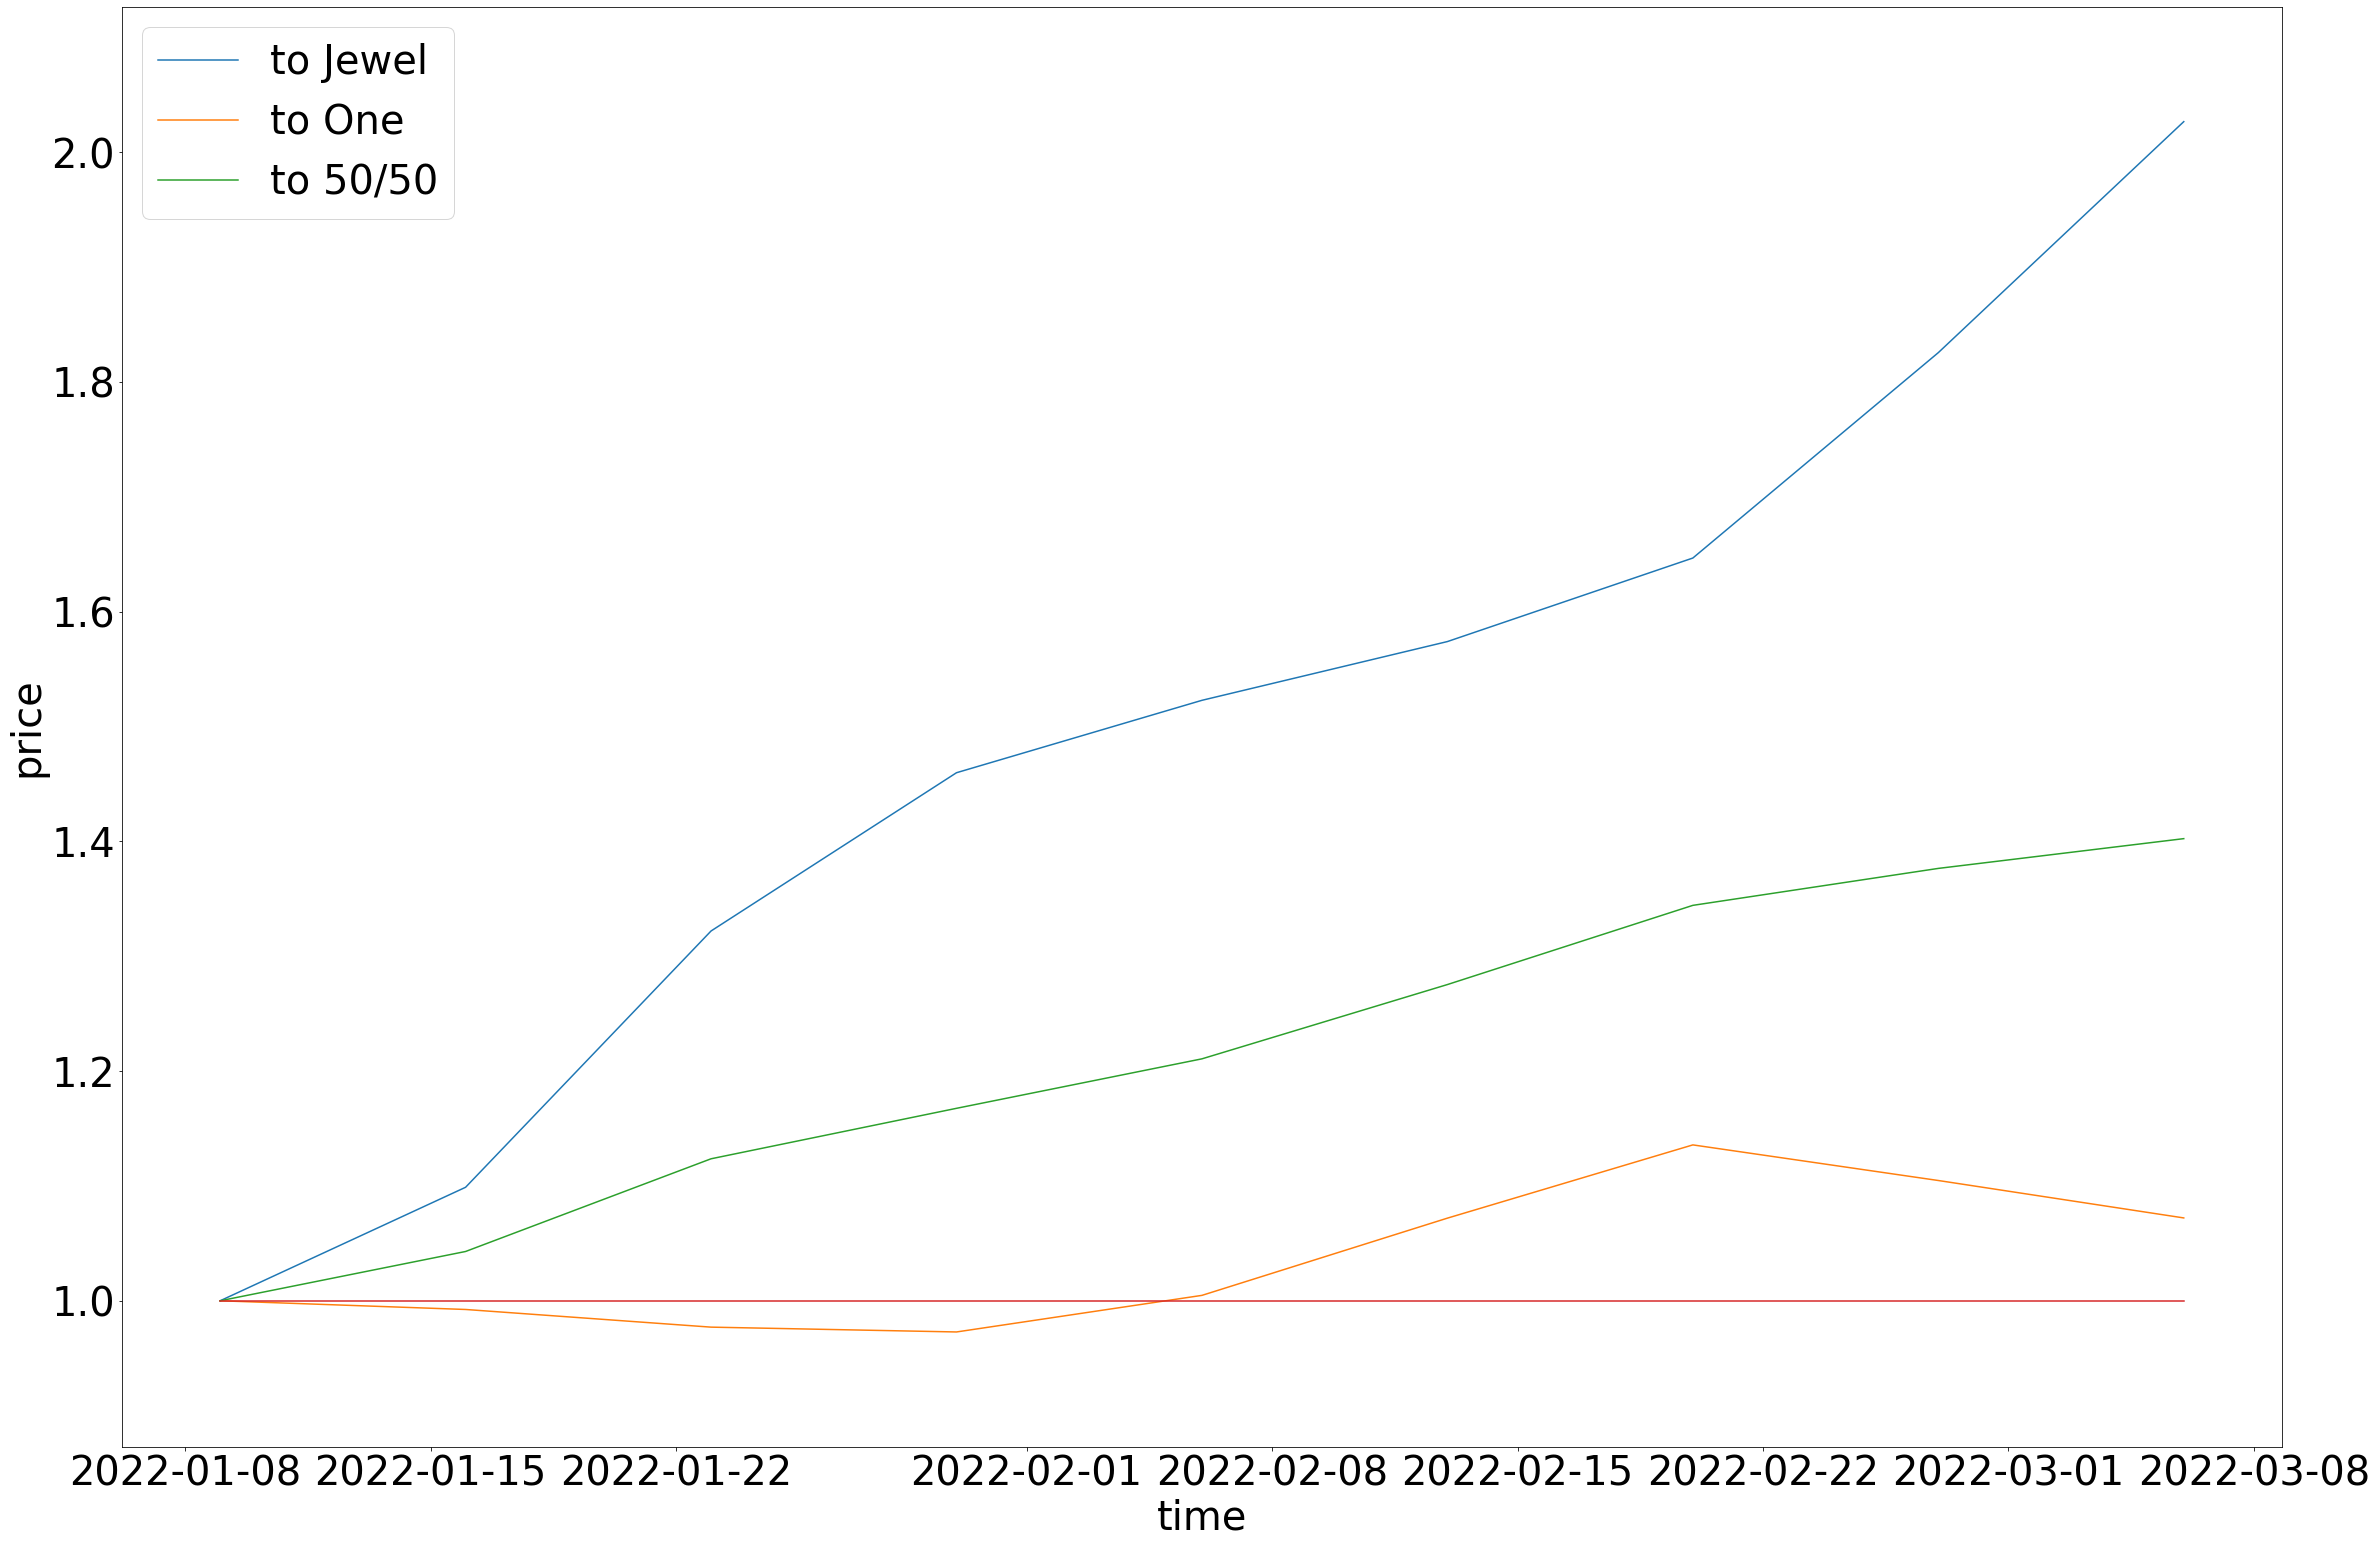

           to x      to y  to 50/50
count  9.000000  9.000000  9.000000
mean   1.497416  1.036842  1.215938
std    0.326965  0.060107  0.144922
min    1.000000  0.972844  1.000000
25%    1.322000  0.992425  1.123641
50%    1.522872  1.004708  1.210677
75%    1.646776  1.072139  1.344327
max    2.026778  1.135737  1.402418


In [3]:
df = c.get_price_cap_volume(datetime.datetime(2022, 1, 1), datetime.datetime.today(), 'week', 'defi-kingdoms')\
    .merge(c.get_price_cap_volume(datetime.datetime(2022, 1, 1), datetime.datetime.today(), 'week', 'harmony'), on='time')
df['price_reward'] = df['price_x']
df = impermanent_loss(df, 200, 2.5/365*7, 0.5)
impermanent_loss_vis(df, 'Jewel', "One")
print(df[['to x', 'to y', 'to 50/50']].describe())

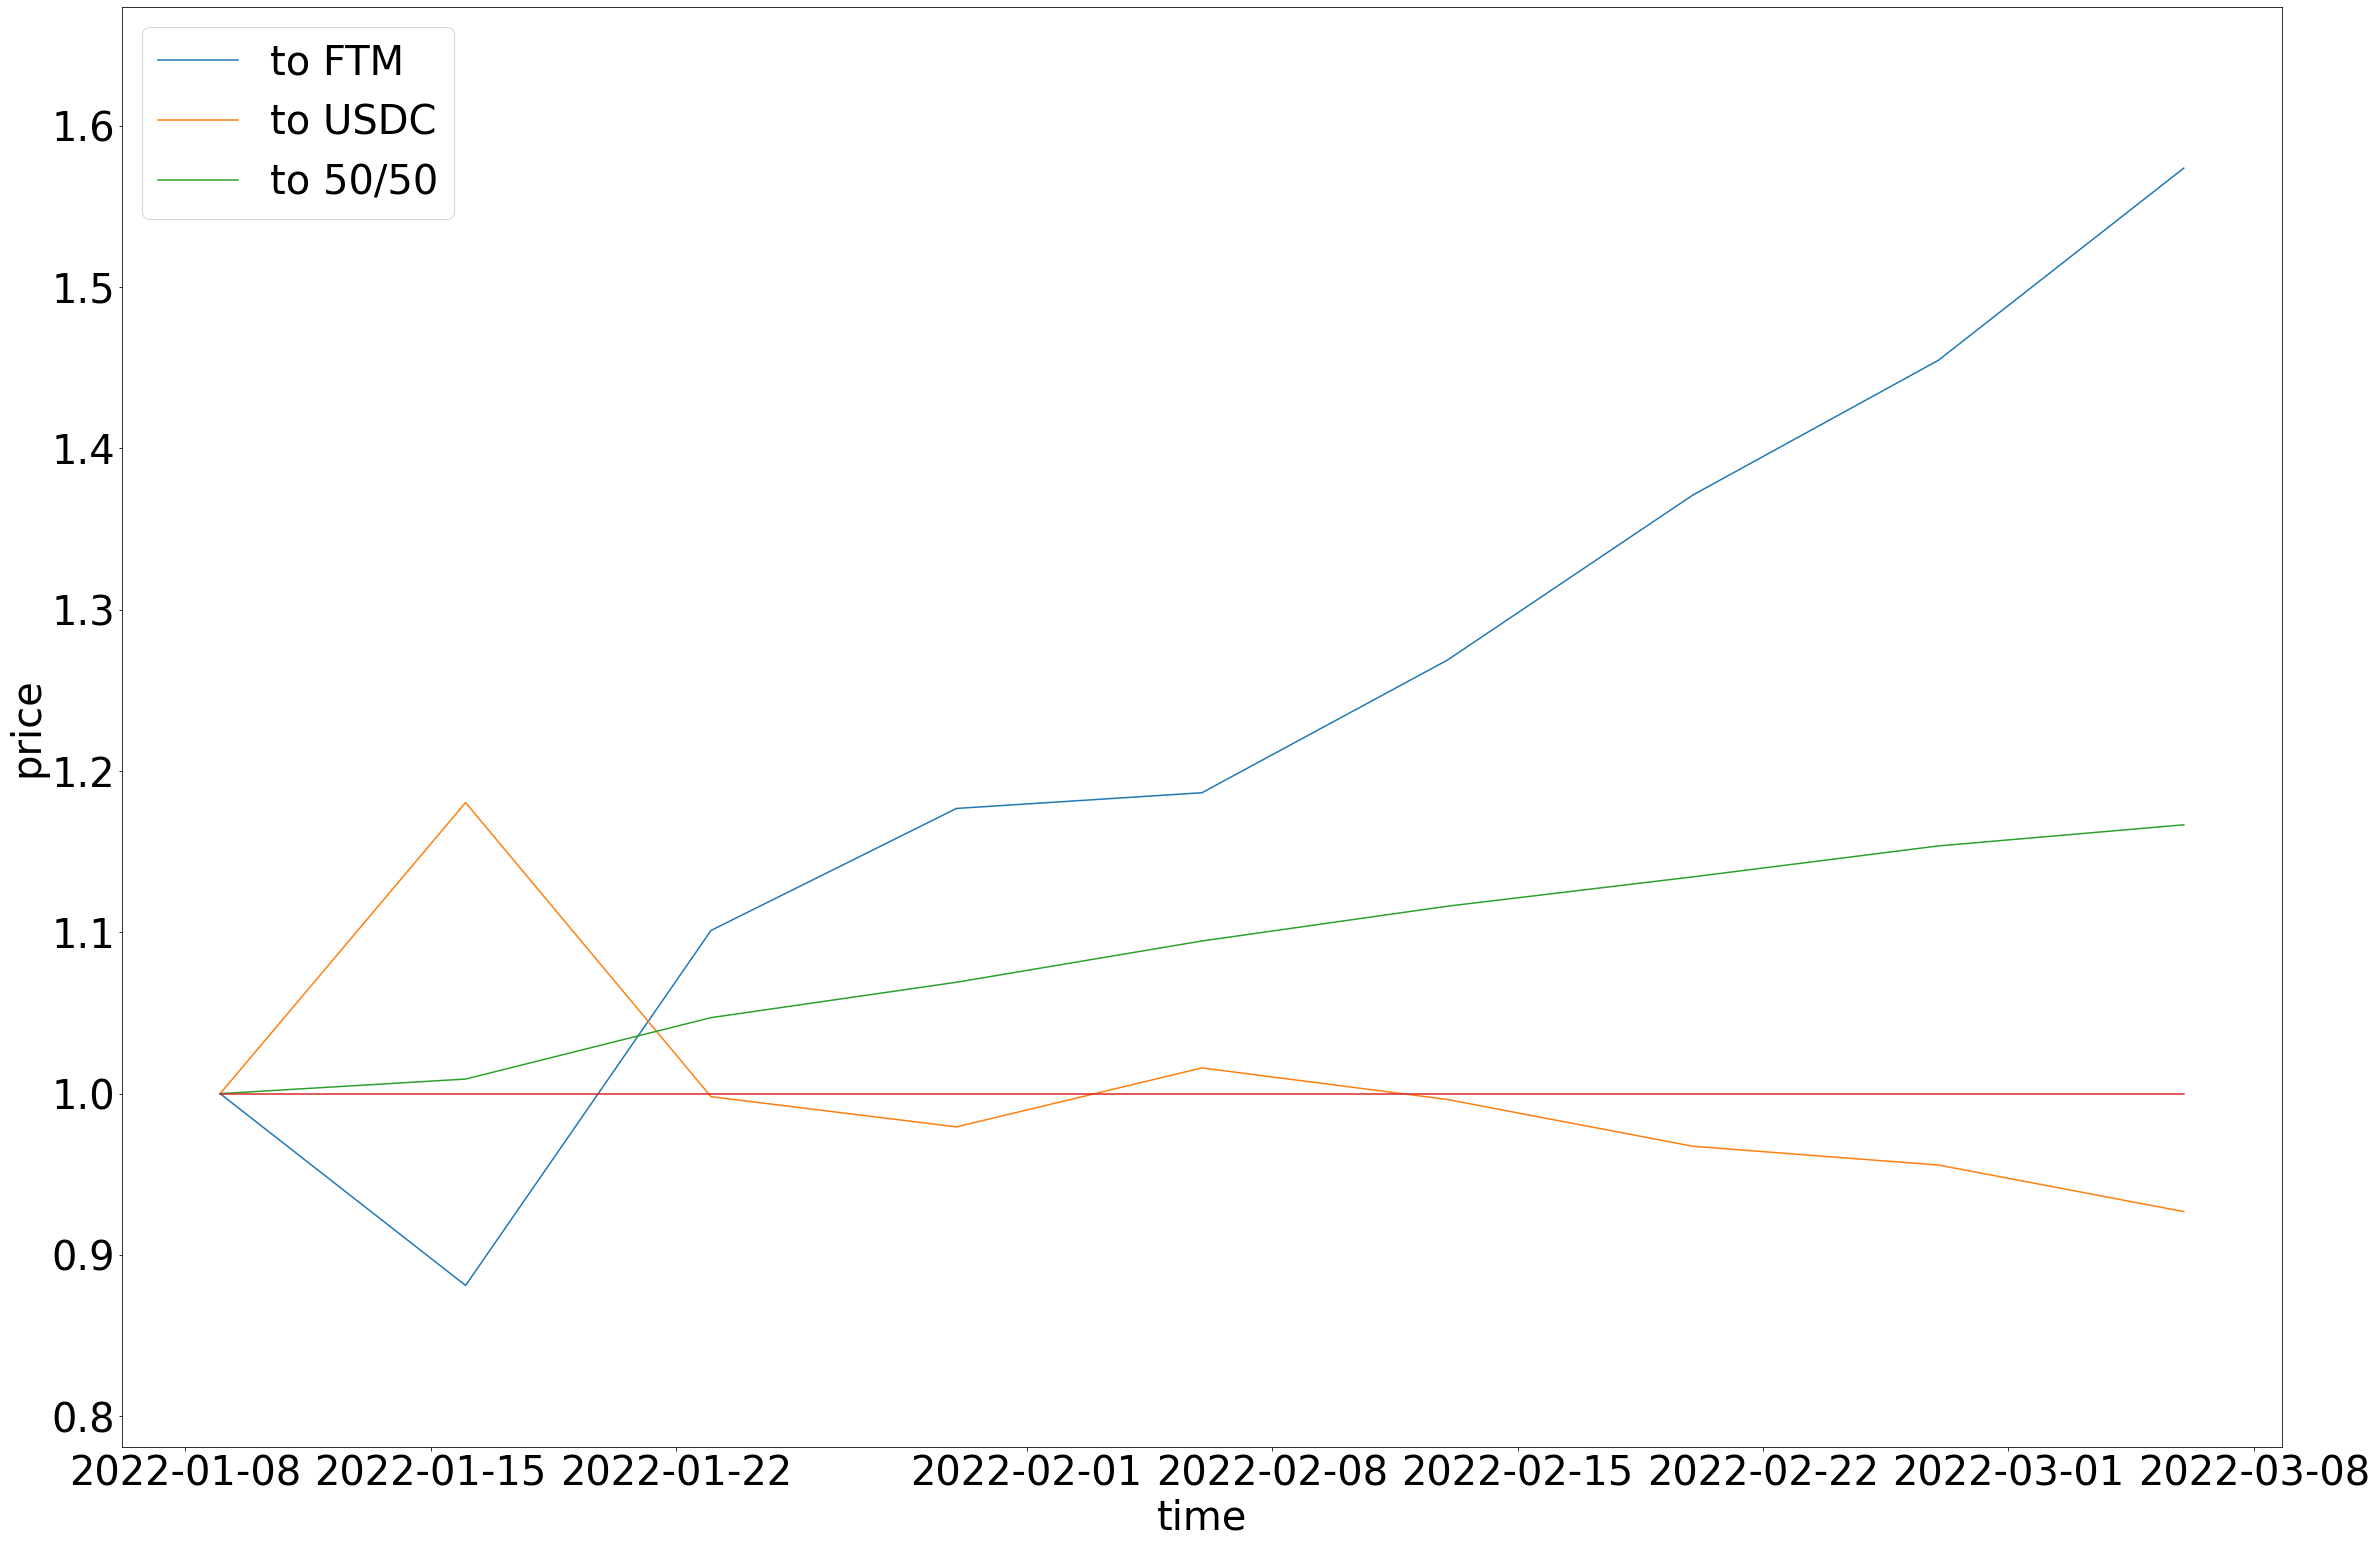

           to x      to y  to 50/50
count  9.000000  9.000000  9.000000
mean   1.223716  1.002258  1.087838
std    0.219505  0.072083  0.060698
min    0.881119  0.926902  1.000000
25%    1.101167  0.967380  1.047113
50%    1.186508  0.996387  1.094626
75%    1.371021  1.000000  1.134364
max    1.573628  1.180425  1.166631


In [4]:
df = c.get_price_cap_volume(datetime.datetime(2022, 1, 1), datetime.datetime.today(), 'week', 'fantom')\
    .merge(c.get_price_cap_volume(datetime.datetime(2022, 1, 1), datetime.datetime.today(), 'week', 'usd-coin'), on='time')
df_aux = c.get_price_cap_volume(datetime.datetime(2022, 1, 1), datetime.datetime.today(), 'week', 'spookyswap')
df['price_reward'] = df_aux['price']
df = impermanent_loss(df, 200, 1.2/365*7, 1)
impermanent_loss_vis(df, 'FTM', "USDC")
print(df[['to x', 'to y', 'to 50/50']].describe())

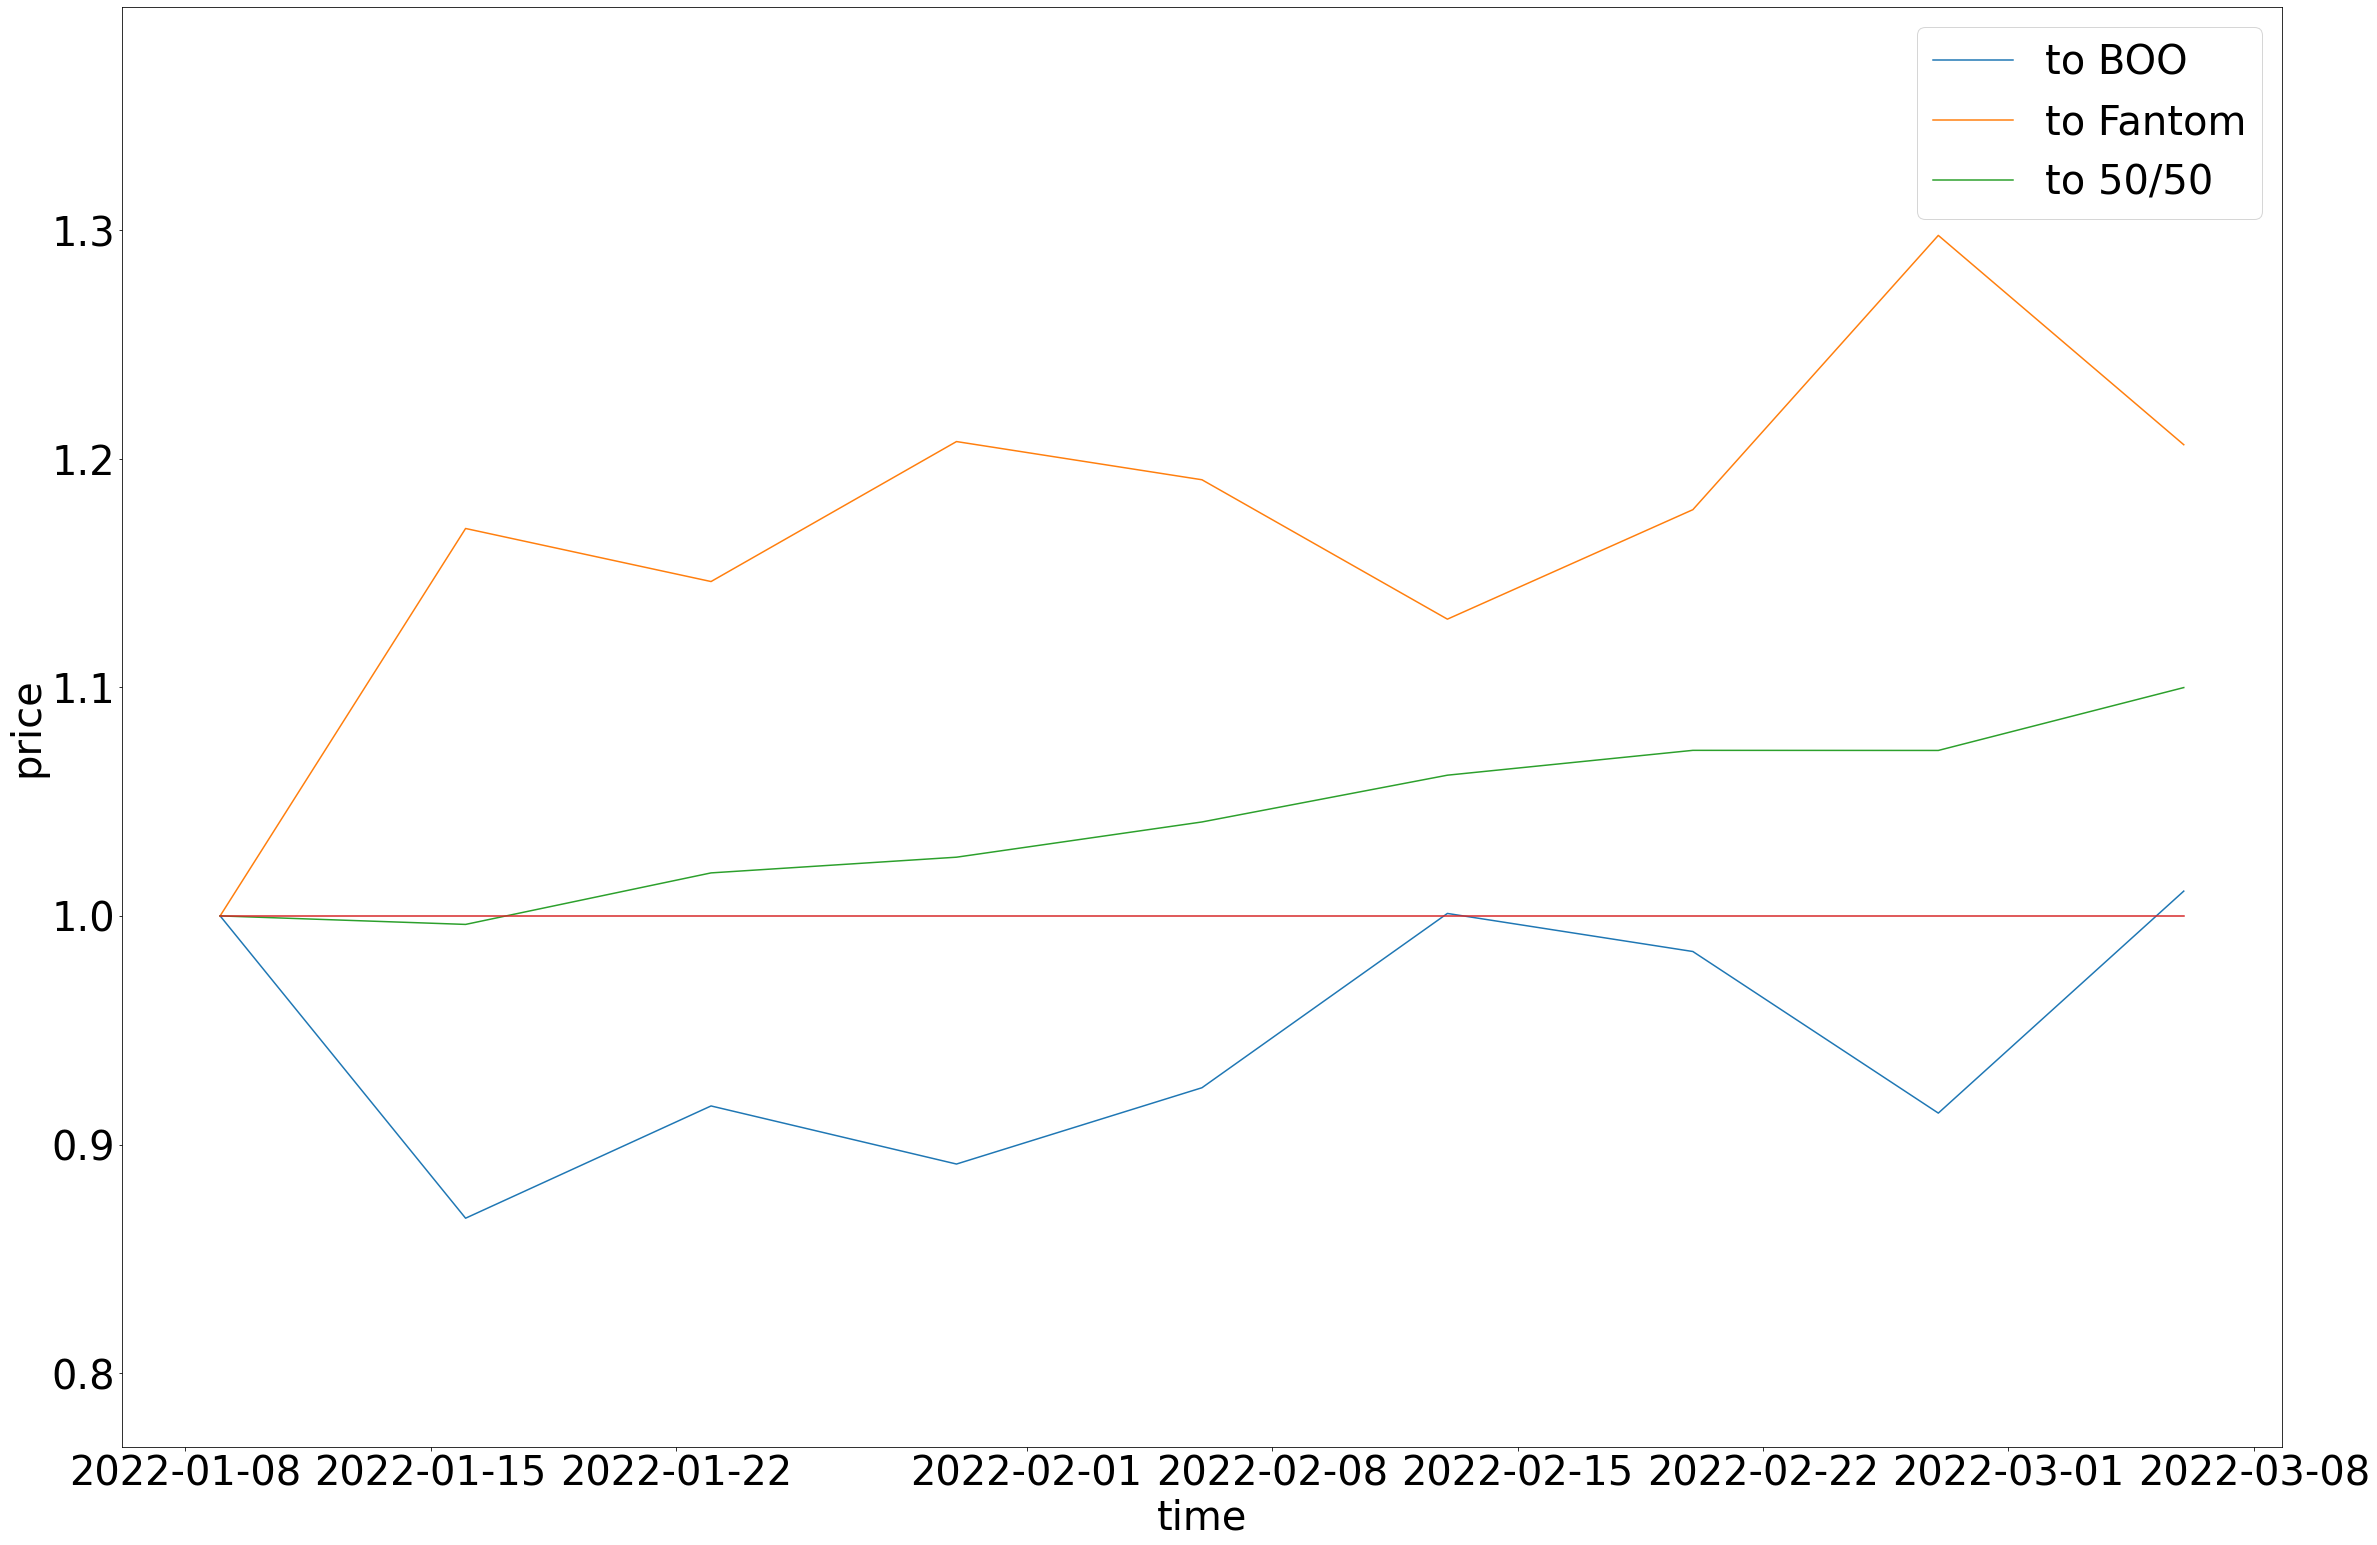

           to x      to y  to 50/50
count  9.000000  9.000000  9.000000
mean   0.945667  1.169484  1.043124
std    0.053694  0.079516  0.035759
min    0.867762  1.000000  0.996278
25%    0.913737  1.146268  1.018813
50%    0.924831  1.177703  1.041094
75%    1.000000  1.206118  1.072380
max    1.010849  1.297684  1.099884


In [5]:
df = c.get_price_cap_volume(datetime.datetime(2022, 1, 1), datetime.datetime.today(), 'week', 'spookyswap')\
    .merge(c.get_price_cap_volume(datetime.datetime(2022, 1, 1), datetime.datetime.today(), 'week', 'fantom'), on='time')
df['price_reward'] = df['price_x']
df = impermanent_loss(df, 200, 0.6/365*7, 1)
impermanent_loss_vis(df, 'BOO', "Fantom")
print(df[['to x', 'to y', 'to 50/50']].describe())